In [201]:
import pandas as pd
import glob
import numpy as numpy
import matplotlib.pyplot as plt
from collections import defaultdict
from tqdm import tqdm
import time
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Read in data


In [2]:
dict_of_stocks_and_dfs = {}
for file_ in glob.glob('../data/updated_historical_stock_data/*.csv'):
    stock_name = file_.rsplit("/")[-1].split('_')[0].lower() 
    print(f"Reading in {stock_name}")
    dict_of_stocks_and_dfs[stock_name] = pd.read_csv(f"{file_}")


Reading in pnr
Reading in bac
Reading in ni
Reading in vno
Reading in ual
Reading in efx
Reading in ph
Reading in rop
Reading in are
Reading in pg
Reading in pvh
Reading in lb
Reading in cern
Reading in peg
Reading in adbe
Reading in emr
Reading in ce
Reading in eqix
Reading in rost
Reading in so


In [3]:
# key is company value is df of data
dict_of_stocks_and_dfs.keys()

dict_keys(['pnr', 'bac', 'ni', 'vno', 'ual', 'efx', 'ph', 'rop', 'are', 'pg', 'pvh', 'lb', 'cern', 'peg', 'adbe', 'emr', 'ce', 'eqix', 'rost', 'so'])

# Create correlation & variance features
- Daily, weekly, 30-days, 90-days, 180-days, 365-days

In [87]:

# here the date is not the index, yet
first_stock_df = dict_of_stocks_and_dfs['ph'].loc[ dict_of_stocks_and_dfs['ph'].date.isin(dict_of_stocks_and_dfs['emr'].date), :]

In [237]:
np.var(first_stock_df.close)

2858.765436116092

In [88]:

# here the date is not the index, yet
first_stock_df = dict_of_stocks_and_dfs['ph'].loc[ dict_of_stocks_and_dfs['ph'].date.isin(dict_of_stocks_and_dfs['emr'].date), :]
#  filter second df by the dates in first

# here the date is not the index, yet
second_stock_df = dict_of_stocks_and_dfs['emr'].loc[ dict_of_stocks_and_dfs['emr'].date.isin(dict_of_stocks_and_dfs['ph'].date), :]

## Set the date as the index and sort

In [89]:
first_stock_df = first_stock_df.sort_values('date')
second_stock_df = second_stock_df.sort_values('date')

first_stock_df = first_stock_df.set_index('date')
second_stock_df = second_stock_df.set_index('date')

In [116]:
first_stock_df.index.max()

'2020-04-17'

In [117]:
second_stock_df.index.max()

'2020-04-17'

In [90]:
np.corrcoef(first_stock_df.close, second_stock_df.close) # all time corrcoef

array([[1.        , 0.95353675],
       [0.95353675, 1.        ]])

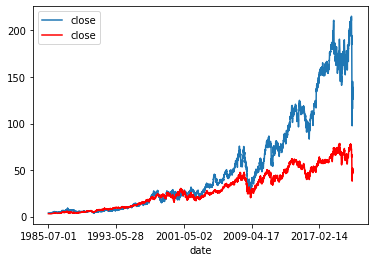

In [98]:

ax = first_stock_df.plot(y='close')
second_stock_df.plot(y='close', color='red', ax=ax)

In [165]:
n_rows = len(first_stock_df)
n_days_stride = 365

previous_row = 0
c = 0

correlation_per_time_period = defaultdict(list)
for day_window in range(n_rows):
    
    if day_window % 100 == 0:
        print(f"Idx {day_window} out of {n_rows}")
    first_stock= first_stock_df.iloc[previous_row:day_window + n_days_stride, :]
    second_stock = second_stock_df.iloc[previous_row:day_window + n_days_stride, :]
#     print(f"Correcoef for {first_stock.index.min()} to {second_stock.index.max()}")
    correlation = np.corrcoef(first_stock.close, second_stock.close)[0,1]

#     print(correlation) 
    
    correlation_per_time_period['date'].append(first_stock.index.min())
    correlation_per_time_period['correlation'].append(correlation)
    
    previous_row+= 1

    
    

Idx 0 out of 8988
Idx 100 out of 8988
Idx 200 out of 8988
Idx 300 out of 8988
Idx 400 out of 8988
Idx 500 out of 8988
Idx 600 out of 8988
Idx 700 out of 8988
Idx 800 out of 8988
Idx 900 out of 8988
Idx 1000 out of 8988
Idx 1100 out of 8988
Idx 1200 out of 8988
Idx 1300 out of 8988
Idx 1400 out of 8988
Idx 1500 out of 8988
Idx 1600 out of 8988
Idx 1700 out of 8988
Idx 1800 out of 8988
Idx 1900 out of 8988
Idx 2000 out of 8988
Idx 2100 out of 8988
Idx 2200 out of 8988
Idx 2300 out of 8988
Idx 2400 out of 8988
Idx 2500 out of 8988
Idx 2600 out of 8988
Idx 2700 out of 8988
Idx 2800 out of 8988
Idx 2900 out of 8988
Idx 3000 out of 8988
Idx 3100 out of 8988
Idx 3200 out of 8988
Idx 3300 out of 8988
Idx 3400 out of 8988
Idx 3500 out of 8988
Idx 3600 out of 8988
Idx 3700 out of 8988
Idx 3800 out of 8988
Idx 3900 out of 8988
Idx 4000 out of 8988
Idx 4100 out of 8988
Idx 4200 out of 8988
Idx 4300 out of 8988
Idx 4400 out of 8988
Idx 4500 out of 8988
Idx 4600 out of 8988
Idx 4700 out of 8988
Idx 

/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


In [168]:
correlation_df = pd.DataFrame(correlation_per_time_period)
correlation_df.set_index('date')

In [169]:
correlation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8988 entries, 0 to 8987
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         8988 non-null   object 
 1   correlation  8987 non-null   float64
dtypes: float64(1), object(1)
memory usage: 140.6+ KB


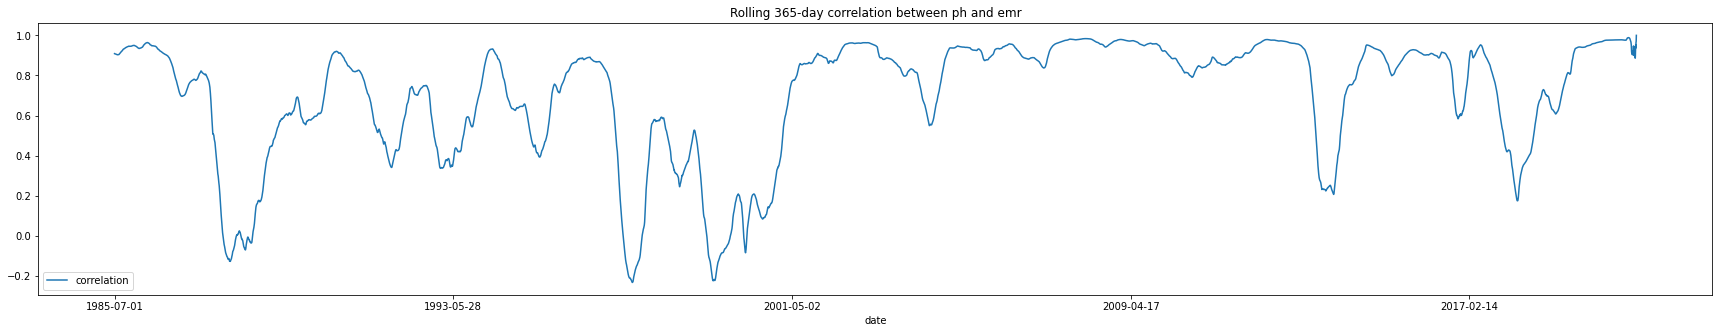

In [170]:
correlation_df.set_index('date').plot(figsize=(30,5), title='Rolling 365-day correlation between ph and emr')

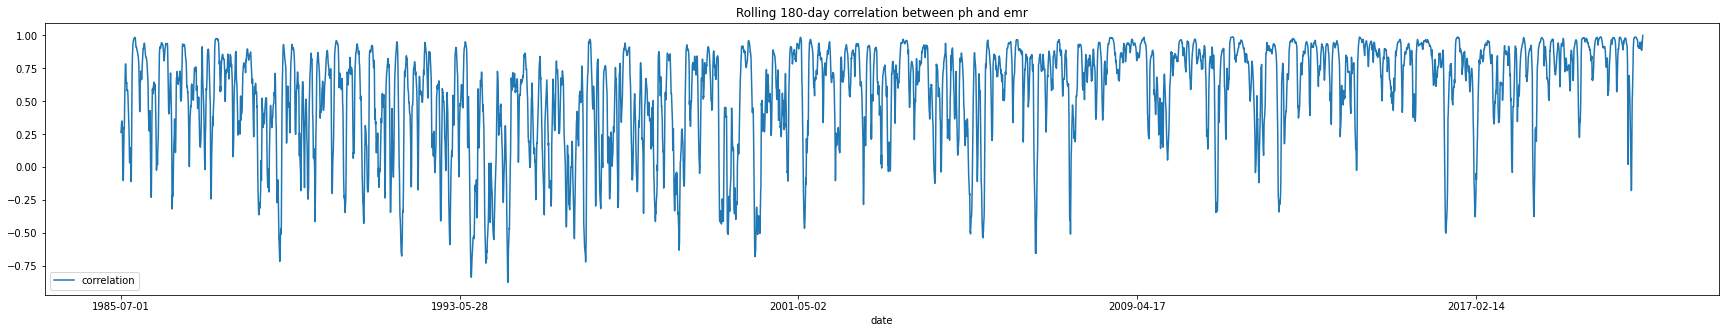

In [163]:
correlation_df.set_index('date').plot(figsize=(30,5), title='Rolling 180-day correlation between ph and emr')

In [161]:
correlation_df.date.max()

'2020-04-17'

In [167]:
correlation_df

,date,correlation
0,1985-07-01,0.265240
1,1985-07-02,0.268368
2,1985-07-03,0.292957
3,1985-07-05,0.318644
4,1985-07-08,0.335072
...,...,...
8983,2020-04-13,0.936544
8984,2020-04-14,0.965812
8985,2020-04-15,0.970104
8986,2020-04-16,1.000000


In [164]:
correlation_df

,date,correlation
0,1985-07-01,0.265240
1,1985-07-02,0.268368
2,1985-07-03,0.292957
3,1985-07-05,0.318644
4,1985-07-08,0.335072
...,...,...
8983,2020-04-13,0.936544
8984,2020-04-14,0.965812
8985,2020-04-15,0.970104
8986,2020-04-16,1.000000


## Build a function to create correlation features for all pairs of stocks

In [363]:
def build_correlation_dfs(dict_of_stocks_and_dfs, n_day_rolling_features_list=[3, 7, 30, 180, 365]):
    """
    Create correlation + variance based  upon daily closing stock prices for given date ranges 3, 7, 30, 180, 365 days
    
    also include daily volume
    
    We are trying to  predict 7 day correaltion
    """

    stock_features_dict = defaultdict(pd.DataFrame)
    start_time = time.time()
    
    start = time.time()
    n_stocks = len(dict_of_stocks_and_dfs.keys())
    
    for idx, first_stock_name in enumerate(dict_of_stocks_and_dfs.keys()):
        print('')
        print(f"Finished {idx/n_stocks} pct of stocks")
        print('')
        for second_stock_name in dict_of_stocks_and_dfs.keys():
            if first_stock_name == second_stock_name:
                continue
            
            # here the date is not the index, yet
            first_stock_df = dict_of_stocks_and_dfs[f"{first_stock_name}"].loc[ 
                dict_of_stocks_and_dfs[f"{first_stock_name}"].date.isin(dict_of_stocks_and_dfs[f"{second_stock_name}"].date), :]
            #  filter second df by the dates in first

            # here the date is not the index, yet
            second_stock_df = dict_of_stocks_and_dfs[f"{second_stock_name}"].loc[ 
                dict_of_stocks_and_dfs[f"{second_stock_name}"].date.isin(dict_of_stocks_and_dfs[f"{first_stock_name}"].date), :]

            # set the date as an index and sort by date
            first_stock_df = first_stock_df.sort_values('date')
            second_stock_df = second_stock_df.sort_values('date')

            first_stock_df = first_stock_df.set_index('date')
            second_stock_df = second_stock_df.set_index('date')
            
            all_features_df = None
            for rolling_idx, rolling_day in enumerate(n_day_rolling_features_list):
                print('rolling_idx', rolling_idx)
                features_df = create_correlation_and_variance_features(
                    first_stock_df, second_stock_df, rolling_day, first_stock_name=first_stock, second_stock_name=second_stock)
                

                
                if rolling_idx == 0:
                    features_df[f"{first_stock_name}_volume"] = list(first_stock_df.volume)
                    features_df[f"{second_stock_name}_volume"] = list(second_stock_df.volume)
                    all_features_df = features_df
                else:
#                     all_features_df = pd.concat((all_features_df, features_df))
                    all_features_df = all_features_df.set_index('date').join(features_df.set_index('date'), lsuffix='_left', rsuffix='_right')
                print(all_features_df.info())
        
            stock_features_dict[f"{first_stock_name}_and_{second_stock_name}"] = all_features_df
            
            
            
            end = time.time()
            print(f"Building all correlations took {(end-start)/60} minutes")
            start = time.time()
            break
        break

    end_time = time.time()
    print(f"Total time {(end_time-start_time) / 60} minutes")
    return stock_features_dict
            
        

# Note: will eventuall need to add in 0s for stocks withour correlation data with other stocks due to date range

In [364]:
def create_correlation_and_variance_features(first_stock_df, second_stock_df, n_days_stride, 
                                             first_stock_name=None, second_stock_name=None):
    """
    n_days_stride: the  number of rolling days to calculate correlation for
    """
    n_rows = len(first_stock_df)

    previous_row = 0

    features_per_time_period = defaultdict(list)
    print(f"Creating correlations + variance on close for {n_days_stride} days")
    
    for day_window in tqdm(range(n_rows)):

        first_stock= first_stock_df.iloc[previous_row:day_window + n_days_stride, :]
        second_stock = second_stock_df.iloc[previous_row:day_window + n_days_stride, :]
        
        correlation = np.corrcoef(first_stock.close, second_stock.close)[0,1]

        features_per_time_period['date'].append(first_stock.index.min())
        features_per_time_period[f"corr_rolling_{n_days_stride}_days"].append(correlation)
        # CODE TO ADD IN VARIANCE
#         first_stock_var = np.var(first_stock.close)
#         second_stock_var = np.var(second_stock.close)
        
#         features_per_time_period[f"{first_stock_name}_var_rolling_{n_days_stride}_days"].append(first_stock_var)
#         features_per_time_period[f"{second_stock_name}_var_rolling_{n_days_stride}_days"].append(second_stock_var)
    
        
        previous_row+= 1 # calculate snapshots every day...7/1-7/7, 7/2-7/8, ...etc
    
    
    features_per_time_period_df = pd.DataFrame(features_per_time_period)
    features_per_time_period_df.set_index('date')
    
    return features_per_time_period_df


In [365]:
# 100 minutes for 20 stocks (20*20 = 400 pairs each pair takes .25 minutes)
final_stock_df = build_correlation_dfs(dict_of_stocks_and_dfs)

  3%|▎         | 114/4029 [00:00<00:03, 1138.32it/s]


Finished 0.0 pct of stocks

rolling_idx 0
Creating correlations + variance on close for 3 days


  4%|▍         | 154/4029 [00:00<00:02, 1539.94it/s]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4029 entries, 0 to 4028
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 4029 non-null   object 
 1   corr_rolling_3_days  4027 non-null   float64
 2   pnr_volume           4029 non-null   int64  
 3   bac_volume           4029 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 126.0+ KB
None
rolling_idx 1
Creating correlations + variance on close for 7 days


  8%|▊         | 323/4029 [00:00<00:02, 1610.80it/s]

<class 'pandas.core.frame.DataFrame'>
Index: 4465 entries, 2005-02-25 to 2020-04-17
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   corr_rolling_3_days  4463 non-null   float64
 1   pnr_volume           4465 non-null   int64  
 2   bac_volume           4465 non-null   int64  
 3   corr_rolling_7_days  4464 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 174.4+ KB
None
rolling_idx 2
Creating correlations + variance on close for 30 days


100%|██████████| 4029/4029 [00:02<00:00, 1567.46it/s]


KeyError: "None of ['date'] are in the columns"

In [357]:
list(final_stock_df.keys())[0]

'pnr_and_bac'

In [358]:
final_stock_df.values()

dict_values([            date  corr_rolling_3_days  pnr_volume  bac_volume
0     2005-02-25            -0.978919      425379     8656470
1     2005-02-28            -0.985118      489224    10653157
2     2005-03-01            -0.998760      479025    11230182
3     2005-03-02             0.704533      458965    10294635
4     2005-03-03             0.538977      589176     9655981
...          ...                  ...         ...         ...
4024  2020-04-13             0.669138      806105    83164717
4025  2020-04-14             0.999157     1355716    88991066
4026  2020-04-15             0.989084     2278293    99082222
4027  2020-04-16             1.000000     1409030    89213331
4028  2020-04-17                  NaN     1153740    92800270

[4029 rows x 4 columns]])

In [359]:
final_stock_df['pnr_and_bac']

,date,corr_rolling_3_days,pnr_volume,bac_volume
0,2005-02-25,-0.978919,425379,8656470
1,2005-02-28,-0.985118,489224,10653157
2,2005-03-01,-0.998760,479025,11230182
3,2005-03-02,0.704533,458965,10294635
4,2005-03-03,0.538977,589176,9655981
...,...,...,...,...
4024,2020-04-13,0.669138,806105,83164717
4025,2020-04-14,0.999157,1355716,88991066
4026,2020-04-15,0.989084,2278293,99082222
4027,2020-04-16,1.000000,1409030,89213331


In [344]:
final_stock_df['pnr_and_bac'][~pd.isna(final_stock_df['pnr_and_bac'].corr_rolling_30_days)]

,date,corr_rolling_3_days,pnr_volume,bac_volume,corr_rolling_7_days,corr_rolling_30_days,corr_rolling_180_days,corr_rolling_365_days
0,2005-02-25,NaN,NaN,NaN,NaN,0.941902,NaN,NaN
1,2005-02-28,NaN,NaN,NaN,NaN,0.944691,NaN,NaN
2,2005-03-01,NaN,NaN,NaN,NaN,0.942435,NaN,NaN
3,2005-03-02,NaN,NaN,NaN,NaN,0.957729,NaN,NaN
4,2005-03-03,NaN,NaN,NaN,NaN,0.943357,NaN,NaN
...,...,...,...,...,...,...,...,...
4023,2020-04-09,NaN,NaN,NaN,NaN,0.925646,NaN,NaN
4024,2020-04-13,NaN,NaN,NaN,NaN,0.871451,NaN,NaN
4025,2020-04-14,NaN,NaN,NaN,NaN,0.989073,NaN,NaN
4026,2020-04-15,NaN,NaN,NaN,NaN,0.989084,NaN,NaN
